In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as scs
import scipy.optimize as sco

In [2]:
def ticker():
    """ 
    Gets the number of assets, and assets to add in a portfolio from the user
        Returns the tickers of the assets
    """
    ticker = []
    num_tickers = int(input("How many assets will be in your portfolio? "))
    
    for num in range(num_tickers):
        tick = input("What asset would you like to add in your portfolio? ").upper()
        ticker.append(tick)
    return ticker

In [3]:
def get_data(tickers):
    """ 
    Gets the time from the user, downloads the Adjusted Close of tickers 
        and returns the data 
    """
    
    time = int(input("How many years worth of data do you want? "))
    end = dt.datetime.today()
    start = end - dt.timedelta(365 * time)
    
    ticker_data = yf.download(tickers, start, end)["Adj Close"]
    data_output = pd.DataFrame(ticker_data)
    
    return data_output

In [4]:
tickers = ticker()

How many assets will be in your portfolio? 7
What asset would you like to add in your portfolio? aapl
What asset would you like to add in your portfolio? amzn
What asset would you like to add in your portfolio? ba
What asset would you like to add in your portfolio? cmg
What asset would you like to add in your portfolio? gme
What asset would you like to add in your portfolio? qcom
What asset would you like to add in your portfolio? tsla


In [5]:
tickers

['AAPL', 'AMZN', 'BA', 'CMG', 'GME', 'QCOM', 'TSLA']

In [6]:
data = get_data(tickers)
data

How many years worth of data do you want? 2
[*********************100%***********************]  7 of 7 completed


,AAPL,AMZN,BA,CMG,GME,QCOM,TSLA
Date,,,,,,,
2019-11-19,65.598106,1752.790039,364.829376,766.780029,5.500000,83.879890,71.903999
2019-11-20,64.834450,1745.530029,368.716248,775.940002,5.460000,81.648438,70.444000
2019-11-21,64.543762,1734.709961,364.272675,773.460022,5.500000,81.162086,70.966003
2019-11-22,64.487099,1745.719971,369.143707,772.609985,5.660000,80.952286,66.608002
2019-11-25,65.617813,1773.839966,370.923126,786.510010,6.030000,81.333733,67.267998
...,...,...,...,...,...,...,...
2021-11-11,147.869995,3472.500000,219.380005,1816.000000,204.320007,164.419998,1063.510010
2021-11-12,149.990005,3525.149902,220.960007,1863.000000,202.100006,164.940002,1033.420044
2021-11-15,150.000000,3545.679932,233.089996,1839.380005,209.139999,168.509995,1013.390015


In [7]:
returns = data.pct_change()
returns

,AAPL,AMZN,BA,CMG,GME,QCOM,TSLA
Date,,,,,,,
2019-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-20,-0.011641,-0.004142,0.010654,0.011946,-0.007273,-0.026603,-0.020305
2019-11-21,-0.004484,-0.006199,-0.012051,-0.003196,0.007326,-0.005957,0.007410
2019-11-22,-0.000878,0.006347,0.013372,-0.001099,0.029091,-0.002585,-0.061410
2019-11-25,0.017534,0.016108,0.004820,0.017991,0.065371,0.004712,0.009909
...,...,...,...,...,...,...,...
2021-11-11,-0.000338,-0.002743,0.004027,0.002202,0.025754,0.028911,-0.004157
2021-11-12,0.014337,0.015162,0.007202,0.025881,-0.010865,0.003163,-0.028293
2021-11-15,0.000067,0.005824,0.054897,-0.012678,0.034834,0.021644,-0.019382


In [8]:
#Mean Returns
mean = returns.mean() * 100
mean

AAPL    0.196317
AMZN    0.160426
BA     -0.007559
CMG     0.201408
GME     1.429983
QCOM    0.194037
TSLA    0.648929
dtype: float64

In [9]:
#The Covariance Matrix
cov = returns.cov() * 100
cov

,AAPL,AMZN,BA,CMG,GME,QCOM,TSLA
AAPL,0.054430,0.031461,0.040782,0.029763,0.029442,0.041602,0.049604
AMZN,0.031461,0.040299,0.017859,0.022589,0.007411,0.029786,0.038772
BA,0.040782,0.017859,0.174398,0.038831,0.069549,0.045580,0.061509
CMG,0.029763,0.022589,0.038831,0.062653,0.030074,0.034117,0.052315
GME,0.029442,0.007411,0.069549,0.030074,1.713593,0.031771,0.054123
QCOM,0.041602,0.029786,0.045580,0.034117,0.031771,0.077080,0.051114
TSLA,0.049604,0.038772,0.061509,0.052315,0.054123,0.051114,0.215210


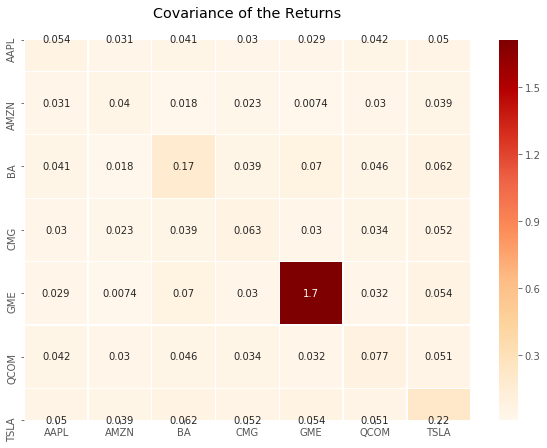

In [10]:
#Plotting the Covariance Matrix

plt.style.use("ggplot")

fig = plt.figure(figsize=(10,len(tickers)))

sns.heatmap(cov,
           cmap="OrRd",
           annot=True,
           linewidth=0.4)

plt.title("Covariance of the Returns\n")
plt.savefig("The Covariance Returns.pdf")
plt.show()

In [13]:
class Efficient_Frontier:
    
    def __init__(self, tickers):
        
        #Input
        self.tickers = tickers
    
    def portfolio_returns(self, weights):
        """
        Returns the annualized (expected) portfolio return,
            given the portfolio weights
        """
        self.weights = weights
        
        return np.sum(returns.mean() * weights) * 252
    
    def portfolio_volatility(self, weights):
        """ 
        Returns the annualized portfolio volatility, 
            given the portfolio weights
        """
        self.weights = weights
        
        return np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    
    def plot_simulation(self):
        """ 
        Uses Monte Carlo simulation to plot the expected return 
            and volatility for random portfolio weights
        """
        portfolio_returns = self.portfolio_returns
        portfolio_volatility = self.portfolio_volatility
        
        port_returns = []
        port_volatility = []
        size = len(tickers)
        
        for i in range(50000):
            weights = np.random.random(size)  #Randomizing the portfolio weights
            weights /= np.sum(weights)      #Normalized to 1 or 100%
            
            port_returns.append(portfolio_returns(weights))
            port_volatility.append(portfolio_volatility(weights))
            
        port_returns = np.array(port_returns)
        port_volatility = np.array(port_volatility)
        
        plt.figure(figsize=(12, len(tickers)))
        plt.scatter(port_volatility, port_returns, c=port_returns/port_volatility,
                    marker = "o", cmap="coolwarm")
        plt.xlabel("Expected Volatility")
        plt.ylabel("Expected Return")
        plt.title("The Monte Carlo Simulation")
        plt.colorbar(label="Sharpe Ratio");
        
        
    def minimize_sharpe(self, weights):
        """ Function to maximize the Sharpe Ratio"""
        self.weights = weights
        portfolio_returns = self.portfolio_returns
        portfolio_volatility = self.portfolio_volatility
        
        return -portfolio_returns(weights) / portfolio_volatility(weights)
        
        
    def plot_frontier(self):
        """
        Plots the Efficient Frontier for the optimal portfolios,
            given a certain target return
        """
        
        portfolio_returns = self.portfolio_returns
        
        portfolio_volatility = self.portfolio_volatility
        
        minimize_sharpe = self.minimize_sharpe
            
        size = len(tickers)
        
        
        port_returns = []
        port_volatility = []
        
        for i in range(50000):
            weights = np.random.random(size)   #Randomizing the portfolio weights
            weights /= np.sum(weights)         #Normalized to 1 or 100%
            
            port_returns.append(portfolio_returns(weights))
            port_volatility.append(portfolio_volatility(weights))
            
        port_returns = np.array(port_returns)
        port_volatility = np.array(port_volatility)
            
        #Getting the maximum Sharpe value (Maximizing the Sharpe ratio) and the optimal portfolio composition
        #by minimizing the negative value of the Sharpe ratio

        #The constraint is that all parameters (weights) add up to 1.
        
        
        eweights = np.array(size * [1. / size,])  #Equal Weight Vectors
            
        cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})  #Equality constraints
            
        bnds = tuple((0, 1) for x in range(size))   #Bounds for parameters
            
        opts = sco.minimize(minimize_sharpe, eweights,
                            method="SLSQP", bounds=bnds,
                            constraints=cons)
        
        maximum_sharpe = portfolio_returns(opts["x"]) / portfolio_volatility(opts["x"]) 
        optimal_weights = [opts["x"].round(3)]
        
        
        #The minimization of the variance of the portfolio (i.e. minimizing the volatility)
        opt_vol = sco.minimize(portfolio_volatility, eweights,
                               method='SLSQP', bounds=bnds,
                               constraints=cons)
            
            
        #Equality constraints and the bounds for the parameters
        constraint = ({'type': 'eq', 'fun': lambda x: portfolio_returns(x) - tret},
                      {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
            
        bound = tuple((0, 1) for x in weights)
        
        
        target_return = np.linspace(0.25, 2.03, 45)
        target_volatility = []
        
        
        for tret in target_return:
            res = sco.minimize(portfolio_volatility, eweights, method='SLSQP',
                               bounds=bound, constraints=constraint)
                
            target_volatility.append(res['fun'])
        
        target_volatility = np.array(target_volatility)
                
        print("The maximum Sharpe ratio is {}".format(maximum_sharpe))
        print("The optimal portfolio weights are:{}".format(list(optimal_weights)))
        
        plt.figure(figsize=(12, len(tickers)))
        plt.scatter(port_volatility, port_returns, c=port_returns/port_volatility,
                    marker='.', alpha=0.9, cmap='coolwarm')
            
        plt.plot(target_volatility, target_return, 'b', lw=3.5)
        plt.plot(portfolio_volatility(opts['x']), portfolio_returns(opts['x']),   #Minimum Variance (Return)
                 'r*', markersize=18.0)
        plt.plot(portfolio_volatility(opt_vol['x']), portfolio_returns(opt_vol['x']),  #Maximum Sharpe (return)
                 'g*', markersize=18.0)
        plt.xlabel('Expected volatility')
        plt.ylabel('Expected return')
        plt.title("The Efficient Frontier")
        plt.colorbar(label='Sharpe ratio')
        plt.savefig("The Efficient Frontier.pdf");

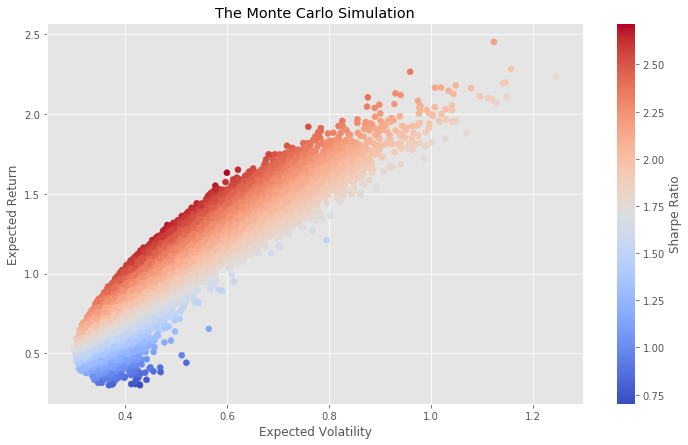

In [12]:
sim = Efficient_Frontier(tickers)
sim.plot_simulation()

The maximum Sharpe ratio is 2.733973026670582
The optimal portfolio weights are:[array([0.007, 0.253, 0.   , 0.06 , 0.154, 0.   , 0.525])]


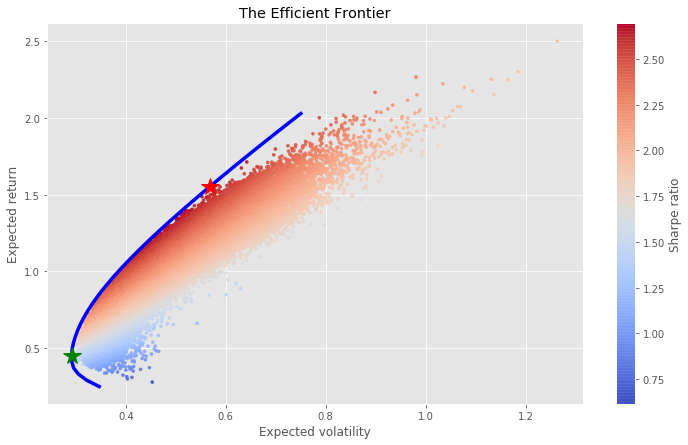

In [14]:
frontier = Efficient_Frontier(tickers)
frontier.plot_frontier()